# Visualizations For Logic Functions

In [3]:
%load_ext autoreload
%autoreload 2
#%matplotlib qt
import numpy as np
from matplotlib import rc
# activate latex text rendering
rc('text', usetex=True)
import matplotlib
# matplotlib.use('QT5Agg')
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 11,
    'text.usetex': True,
    'pgf.rcfonts': False,
    'axes.unicode_minus': False,
})
matplotlib.rcParams['text.latex.preamble'] = r'\DeclareUnicodeCharacter{2212}{-}' #for \text command

import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

from neural_net import *
from weight_init import *
from vis_err_space import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [2]:
df = pd.DataFrame({'x': [0,1,0,1], 'y': [0,0,1,1], 'AND': [0,0,0,1], 'OR': [0,1,1,1], 'XOR': [0,1,1,0]})
sns.set_theme(style="ticks")

## Feature Spaces

### AND

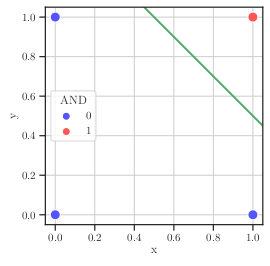

In [60]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y', hue='AND', s=100, palette='seismic')
plt.grid(True, which='both')
plt.plot([0.4, 1.1], [1.1, 0.4], linewidth=2, color='g')
ax.set_xlim(xmin=-0.05, xmax=1.05)
ax.set_ylim(ymin=-0.05, ymax=1.05)
ax.set_aspect('equal')
# plt.savefig('imgs/and/AND_feature_space', dpi=300)
plt.savefig('imgs/AND/AND_feature_space.pgf')

### OR

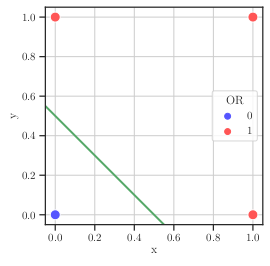

In [61]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y', hue='OR', s=100, palette='seismic')
plt.grid(True, which='both')
plt.plot([-0.1, 0.6], [0.6, -0.1], linewidth=2, color='g')
ax.set_xlim(xmin=-0.05, xmax=1.05)
ax.set_ylim(ymin=-0.05, ymax=1.05)
ax.set_aspect('equal')
plt.savefig('imgs/OR/OR_feature_space.pgf')

### XOR

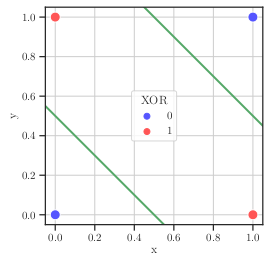

In [62]:
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='x', y='y', hue='XOR', s=100, palette='seismic')
plt.grid(True, which='both')
plt.plot([0.4, 1.1], [1.1, 0.4], linewidth=2, color='g')
plt.plot([-0.1, 0.6], [0.6, -0.1], linewidth=2, color='g')
ax.set_xlim(xmin=-0.05, xmax=1.05)
ax.set_ylim(ymin=-0.05, ymax=1.05)
ax.set_aspect('equal')
plt.savefig('imgs/XOR/XOR_feature_space.pgf')

## Converged Weights

### AND

In [25]:
X = np.transpose(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))
Y = np.array([[0, 0, 0, 1]])

In [26]:
misclassificationsAND = []
final_weightsAND = []
dim_list = [2,1]
weight_combs = init_weight_grid(dim_list, -1, 1, 10)

In [ ]:
for i, weights in enumerate(weight_combs):
    print(f'Combination {i+1}/{len(weight_combs)}')
    nn = MyNetwork(dim_list, weights=weights)
    _, _, misclass = nn.fit(X, Y, learning_rate=0.1, num_iterations=10000, print_cost=False, plot_costs=False)
    misclassificationsAND.append(misclass)
    
    final_params = nn.parameters
    display(final_params)
    final_weights = []
    for l in range(len(dim_list)-1):
        final_weights.append(np.concatenate((final_params['W' + str(l+1)], final_params['b' + str(l+1)]), axis=1))
    final_weightsAND.append(final_weights)

print(f'Overall NR of Misclassification of 10000 models: {np.sum(misclassificationsAND)*4}')

np.savez('AND_weights_misclass_better.npz', fw=final_weightsAND, mc=misclassificationsAND)

In [27]:
data = np.load('AND_weights_misclass_better.npz')
final_weights = data['fw']

In [29]:
# visualize_3D_err_space(X, Y, final_weights, act_function='relu', biases=False, name='AND', xyzlabel=('$w_1$', '$w_2$', 'Loss'), zlabelpad=10)
visualize_3D_err_space_all_possibilities(X, Y, dim_list, 20, act_function='relu', biases=True, sym_dim=[1,1], sym_weights=[[{1:0}]], name='AND', xyzlabel=('$w_1 = w_2$', 'bias', 'Loss'))

[[  7.40517671   7.40517671 -11.2803921 ]
 [  7.40671211   7.40671199 -11.28269167]
 [  7.40828382   7.40828356 -11.28504559]
 ...
 [  7.41361548   7.41361574 -11.29303152]
 [  7.41524798   7.41524811 -11.29547652]
 [  7.41694477   7.41694477 -11.29801782]]


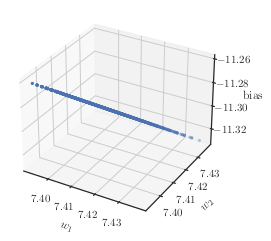

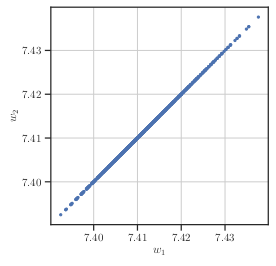

In [86]:
visualize_weights3D(final_weights, name='AND')
visualize_weights2D(final_weights, name='AND')

### OR

In [30]:
X = np.transpose(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]))
Y = np.array([[0, 1, 1, 1]])

In [31]:
misclassificationsOR = []
final_weightsOR = []
dim_list = [2,1]
weight_combs = init_weight_grid(dim_list, -1, 1, 10)

In [ ]:
for i, weights in enumerate(weight_combs):
    print(f'Combination {i+1}/{len(weight_combs)}')
    nn = MyNetwork(dim_list, weights=weights)
    _, _, misclass = nn.fit(X, Y, learning_rate=0.1, num_iterations=10000, print_cost=False, plot_costs=False)
    misclassificationsOR.append(misclass)
    
    final_params = nn.parameters
    display(final_params)
    final_weights = []
    for l in range(len(dim_list)-1):
        final_weights.append(np.concatenate((final_params['W' + str(l+1)], final_params['b' + str(l+1)]), axis=1))
    final_weightsOR.append(final_weights)

print(f'Overall NR of Misclassification of 10000 models: {np.sum(misclassificationsOR)*4}')

np.savez('OR_weights_misclass_better.npz', fw=final_weightsOR, mc=misclassificationsOR)

In [32]:
data = np.load('OR_weights_misclass_better.npz')
final_weights = data['fw']

In [33]:
# visualize_3D_err_space(X, Y, final_weights, act_function='relu', biases=False, name='OR', xyzlabel=('$w_1$', '$w_2$', 'Loss'), zlabelpad=10)
visualize_3D_err_space_all_possibilities(X, Y, dim_list, 20, act_function='relu', biases=True, sym_dim=[1,1], sym_weights=[[{1:0}]], name='OR', xyzlabel=('$w_1 = w_2$', 'bias', 'Loss'))

In [116]:
compute_single_err(X, Y, np.array([[[1,1,-0.47368421]]]), act_function='relu')

[[0.38374461 0.62862342 0.62862342 0.82146663]] [[0 1 1 1]]


0.402300892686186

[[ 8.65274401  8.65274401 -3.8611819 ]
 [ 8.65458097  8.65444189 -3.8620719 ]
 [ 8.65647838  8.65619194 -3.86299025]
 ...
 [ 8.66599975  8.66641309 -3.86796089]
 [ 8.66855268  8.66877073 -3.86919723]
 [ 8.67128262  8.67128262 -3.87051695]]


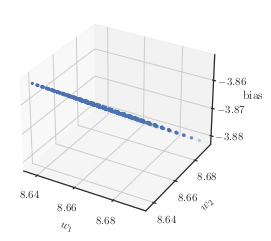

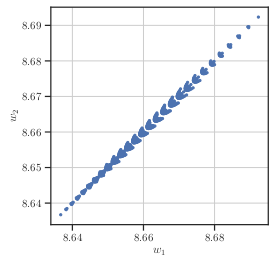

In [92]:
visualize_weights3D(final_weights, name='OR')
visualize_weights2D(final_weights, name='OR')

### XOR

#### Error Space

In [3]:
xor_data = np.load('XOR_error_space.npz')

flattened_weights = xor_data['flat']
entropies = xor_data['cross']

In [4]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection

In [ ]:
# pca = PCA(n_components=2)
# weights_pca = pca.fit_transform(flattened_weights)

# tsne = TSNE(n_components=2, learning_rate=300, perplexity=30, early_exaggeration=12, init='random', random_state=2019)
# weights_tsne = tsne.fit_transform(flattened_weights)

# lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, method = 'modified', n_jobs=1,  random_state=2019)
# lle.fit(flattened_weights[::100])
# weights_lle = lle.transform(flattened_weights)

# np.savez('XOR_error_reduced.npz', pca=weights_pca, tsne=weights_tsne, lle=weights_lle)

In [5]:
np.load('XOR_error_reduced')
weights = weights_lle
c1s = weights[:,0]
c2s = weights[:,1]

df = pd.DataFrame(weights, columns=['c1', 'c2'])
df['Loss'] = entropies
print(df.shape)
df = df.groupby(['c1', 'c2'])['Loss'].mean().reset_index()
print(df.shape)

df = df.sort_values(by=['c1'])
df = df.iloc[::100, :]


NameError: name 'weights_lle' is not defined

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.scatter(df['c1'], df['c2'], df['Loss'], s=5)
ax.plot_trisurf(df['c1'], df['c2'], df['Loss'], linewidth=0.2, antialiased=True)

ax.set_xlabel('$c_1$')
ax.set_ylabel('$c_2$')
ax.set_zlabel('Loss', labelpad=10)

# plt.show()
plt.savefig(f'imgs/XOR/XOR_3D_error_space_all_weights.pgf')
# plt.savefig(f'imgs/XOR/XOR_3D_error_space_all_weights.png')

In [111]:
plt.close()
plt.cla()
plt.clf()

#### Converged Weights

In [4]:
xor_data = np.load('XOR_grid_adam.npz', allow_pickle=True)

weight = xor_data['fw']
misclassificationsXOR = xor_data['mc']
entropiesXOR = xor_data['ent']

In [5]:
display(final_weightsXOR.shape)
display(misclassificationsXOR.shape)
display(entropiesXOR.shape)

(1000000, 2)

(1000000,)

(1000000,)

In [24]:
import math
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

perfect_weights = final_weightsXOR[misclassificationsXOR == 0]
# print(perfect_weights[0])

In [25]:
predictions = []
prediction_hashes = []
hashes_dict = {}

X = np.array([[0,0],[0,1],[1,0],[1,1]]).T
for weight in perfect_weights:
    first = linear_forward(X, weight[0][:,:2], weight[0][:,2])[0]
    sig_first = sigmoid(first)
    first_pred = sig_first > 0.5
    second = linear_forward(X, weight[1][:,:2], weight[1][:,2])[0]
    sig_second = sigmoid(second)
    second_pred = sig_second > 0.5
    
    pred = np.concatenate((first_pred, second_pred))
    predictions.append(pred)
    hash_arr = (hash(pred[0].tobytes()), hash(pred[1].tobytes()), hash(pred[2].tobytes()))
    inv_hash_arr = (hash(pred[1].tobytes()), hash(pred[0].tobytes()), hash(pred[2].tobytes()))
    if hash_arr not in hashes_dict:
        hashes_dict[hash_arr] = pred
    if inv_hash_arr not in hashes_dict:
        hashes_dict[inv_hash_arr] = pred
    prediction_hashes.append(hash_arr)

In [26]:
hashes = np.array(prediction_hashes)
# hashes[:,:2] = np.sort(hashes[:,:2], axis=1)
unique_hashes = np.unique(hashes, axis=0)
print('Nr of unique combinations:', len(unique_hashes))

comb_occ = []
for uhash in unique_hashes:
    is_uhash = list(map(lambda x: all(x == uhash), hashes))
    comb_occ.append((np.array(is_uhash).sum(), hashes_dict[tuple(uhash)]))
#     print('Combination:')
#     print(hashes_dict[tuple(uhash)])
#     print('Number of occurences:')
#     print(np.array(is_uhash).sum(), "{:.2f}%".format(100 * np.array(is_uhash).sum() / len(hashes)))

count = 0
for nr, comb in sorted(comb_occ, reverse=True, key=lambda x: x[0])[:16]:
    count += nr
    print(comb)
    print(nr, "{:.2f}%".format(100 * nr / len(hashes)))
print('total right:', count)

Nr of unique combinations: 16
[[False False  True False]
 [ True False  True  True]
 [ True False  True  True]]
60441 10.56%
[[False  True False False]
 [ True  True False  True]
 [ True False  True  True]]
60441 10.56%
[[ True False  True  True]
 [False False  True False]
 [ True  True False  True]]
60441 10.56%
[[ True  True False  True]
 [False  True False False]
 [ True  True False  True]]
60441 10.56%
[[False  True False False]
 [False False  True False]
 [False  True  True  True]]
51957 9.08%
[[False  True False False]
 [False False  True False]
 [False  True  True  True]]
51957 9.08%
[[False False False  True]
 [ True False False False]
 [ True False False False]]
44377 7.76%
[[False False False  True]
 [ True False False False]
 [ True False False False]]
44376 7.76%
[[ True False False False]
 [ True  True  True False]
 [False  True False False]]
37705 6.59%
[[ True  True  True False]
 [ True False False False]
 [False False  True False]]
37705 6.59%
[[False  True  True  True]

In [8]:
# examples_nand_or_and = []
# counter_non = 0
# counter_nonnon = 0
# counter_zero = 0
# counter_lol = 0
# counter_lollol = 0
# examples_other = []

# for weights in perfect_weights:
# #     if ((weights[1][0,0] > 0) and (weights[1][0,1] > 0) and (-weights[1][0,2] > weights[1][0,0]) and (-weights[1][0,2] > weights[1][0,1]) \
# #         and (weights[0][0,0] > 0) and (weights[0][0,1] > 0) and (0 > -weights[0][0,2] < weights[0][0,0]) and (0 > -weights[0][0,2] > weights[0][0,1]) \
# #         and (weights[0][1,0] < 0) and (weights[0][1,1] < 0) and (weights[0][1,2] > -weights[0][1,0]) and (weights[0][1,2] > -weights[0][1,1])) \
# #         or ((weights[1][0,0] > 0) and (weights[1][0,1] > 0) and (-weights[1][0,2] > weights[1][0,0]) and (-weights[1][0,2] > weights[1][0,1]) \
# #         and (weights[0][1,0] > 0) and (weights[0][1,1] > 0) and (0 > -weights[0][1,2] < weights[0][1,0]) and (0 > -weights[0][1,2] > weights[0][1,1]) \
# #         and (weights[0][0,0] < 0) and (weights[0][0,1] < 0) and (weights[0][0,2] > -weights[0][0,0]) and (weights[0][0,2] > -weights[0][0,1])):
# #         examples_nand_or_and.append(weights)
#     if (((weights[0][0,0] > 0) and (weights[0][0,1] < 0)) or ((weights[0][0,0] < 0) and (weights[0][0,1] > 0))) \
#         or (((weights[0][1,0] > 0) and (weights[0][1,1] < 0)) or ((weights[0][1,0] < 0) and (weights[0][1,1] > 0))):
#         counter_non += 1
#         if (((weights[1][0,0] > 0) and (weights[1][0,1] > 0)) or ((weights[1][0,0] < 0) and (weights[1][0,1] < 0))):
#             counter_nonnon+=1
#     if (((weights[0][0,0] >= 0) and (weights[0][0,1] <= 0)) or ((weights[0][0,0] <= 0) and (weights[0][0,1] >= 0))) \
#         or (((weights[0][1,0] >= 0) and (weights[0][1,1] <= 0)) or ((weights[0][1,0] <= 0) and (weights[0][1,1] >= 0))):
#         counter_zero += 1
#     if (((weights[0][0,0] > 0) and (weights[0][0,1] > 0)) or ((weights[0][0,0] < 0) and (weights[0][0,1] < 0))) \
#         and (((weights[0][1,0] > 0) and (weights[0][1,1] > 0)) or ((weights[0][1,0] < 0) and (weights[0][1,1] < 0))):
#         counter_lol += 1
#         examples_other.append(weights)
#         if (((weights[1][0,0] > 0) and (weights[1][0,1] > 0)) or ((weights[1][0,0] < 0) and (weights[1][0,1] < 0))):
#             counter_lollol+=1
#             examples_nand_or_and.append(weights)
            
        

# print(counter_non, counter_nonnon, counter_zero, counter_lol, counter_lollol, len(perfect_weights))
# # print(examples_other[0])
# # print(examples_nand_or_and[0])

152136 47177 152136 117079 32414 269215


In [7]:
weightsXOR = []
for i, arr in enumerate(final_weightsXOR):
    flat_list = []
    for sublist in arr:
        for item in sublist:
            flat_list.append(item)
    flat_list = np.array(flat_list).flatten()
    weightsXOR.append(flat_list)
weightsXOR = np.array(weightsXOR)

In [8]:
print(weightsXOR.shape, weightsXOR[0])

(1000000, 9) [-9.23304749 -9.23304749  0.69825923 -9.23304749 -9.23304749  0.69825923
 -6.07059336 -6.07059336  0.69383508]


In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
weights = pca.fit_transform(weightsXOR)

# tsne = TSNE(n_components=3,learning_rate=300,perplexity = 30,early_exaggeration = 12,init = 'random',  random_state=2019)
# X_tsne = tsne.fit_transform(X_m[:10000,:])

weights = np.concatenate((weights, entropiesXOR.reshape(-1, 1)), axis=1)
weights = np.sort(weights, axis=0)[::250]
c1s = weights[:,0]
c2s = weights[:,1]
c3s = weights[:,2]


In [10]:
fig, ax = plt.subplots()
ax.scatter(c1s, c2s, s=5)
ax.set_xlabel('$c_1$')
ax.set_ylabel('$c_2$')

plt.savefig(f'imgs/XOR/XOR_error_space_converged_weights2D_adam.pgf')
plt.close()

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(c1s, c2s, c3s, s=5)
# ax.plot_trisurf(df['c1'], df['c2'], df['Loss'], linewidth=0.2, antialiased=True)

ax.set_xlabel('$c_1$')
ax.set_ylabel('$c_2$')
ax.set_zlabel('Loss', labelpad=10)

# plt.show()
plt.savefig(f'imgs/XOR/XOR_error_space_converged_weights3D_adam.pgf')
# plt.savefig(f'imgs/XOR/XOR_3D_error_space_all_weights.png')
plt.close()

In [42]:
xor_data = np.load('XOR_grid_adam.npz', allow_pickle=True)

final_weightsXOR = xor_data['fw']
misclassificationsXOR = xor_data['mc']
entropiesXOR = xor_data['ent']

In [45]:
display((misclassificationsXOR==0.0).sum())

572207

In [46]:
display((misclassificationsXOR==0.25).sum())

109699

In [47]:
display((misclassificationsXOR==0.5).sum())

318077

In [48]:
display((misclassificationsXOR==0.75).sum())

17

In [49]:
display((misclassificationsXOR==1.0).sum())

0

In [3]:
xor_data = np.load('XOR_grid_sgd_momentum.npz', allow_pickle=True)

final_weightsXOR = xor_data['fw']
misclassificationsXOR = xor_data['mc']
entropiesXOR = xor_data['ent']

In [4]:
display((misclassificationsXOR==0.0).sum())

572207

In [5]:
display((misclassificationsXOR==0.25).sum())

109699

In [6]:
display((misclassificationsXOR==0.5).sum())

318077

In [7]:
display((misclassificationsXOR==0.75).sum())

17

In [8]:
display((misclassificationsXOR==1.0).sum())

0